<a href="https://colab.research.google.com/github/DeisyData/ML_Regresion/blob/main/Integrador_RGD_Lineal_Costos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LIbrerías

In [ ]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

# Preprocesado y modelado
# ==============================================================================
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Configuración matplotlib
# ==============================================================================
plt.rcParams['image.cmap'] = "bwr"
#plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')


In [ ]:
df = pd.read_excel('DatosRegLineal.xlsx')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Kg. año      32 non-null     float64
 1   Costo anual  32 non-null     float64
 2   Unnamed: 2   0 non-null      float64
 3   Unnamed: 3   4 non-null      object 
 4   Unnamed: 4   4 non-null      float64
 5   Unnamed: 5   2 non-null      object 
dtypes: float64(4), object(2)
memory usage: 1.6+ KB


<Axes: xlabel='Kg. año', ylabel='Costo anual'>

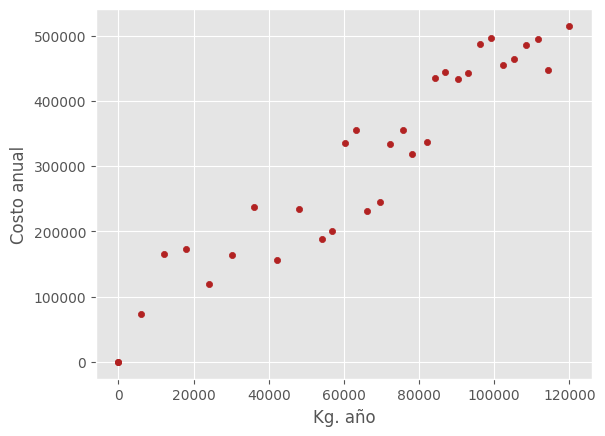

In [ ]:
df.plot( x    = 'Kg. año',  y    = 'Costo anual',     c= 'firebrick', kind = "scatter")

In [ ]:
# Correlación lineal entre las dos variables
# ==============================================================================
corr_test = pearsonr(x = df['Kg. año'], y =  df['Costo anual'])
print("Coeficiente de correlación de Pearson: ", corr_test[0])
print("P-value: ", corr_test[1])

Coeficiente de correlación de Pearson:  0.9535250002883153
P-value:  3.5453483781814807e-17


In [ ]:
# División de los datos en train y test
# ==============================================================================
X = df[['Kg. año']]
y = df['Costo anual']

X_train, X_test, y_train, y_test = train_test_split(
                                        X.values.reshape(-1,1),
                                        y.values.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

# Creación del modelo
# ==============================================================================
modelo = LinearRegression()
modelo.fit(X = X_train.reshape(-1, 1), y = y_train)

LinearRegression()

In [ ]:
# Información del modelo
# ==============================================================================
#print("Intercept:", modelo.intercept_)
print("Coeficiente:", list(zip(X.columns, modelo.coef_.flatten(), )))
print("Coeficiente de determinación R^2:", modelo.score(X, y))

Coeficiente: [('Kg. año', 4.207757493185027)]
Coeficiente de determinación R^2: 0.9083154316352805


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [ ]:
# Error de test del modelo
# ==============================================================================
predicciones = modelo.predict(X = X_test)
print(predicciones[0:10,])

rmse = mean_squared_error(
        y_true  = y_test,
        y_pred  = predicciones,
        squared = False
       )
print("")
print(f"El error (rmse) de test es: {rmse}")

[[230045.77046848]
 [280700.43827443]
 [154063.76875954]
 [ 78081.7670506 ]
 [483319.10949827]
 [255373.10437145]
 [128736.43485656]]

El error (rmse) de test es: 46774.86759929488
